<a href="https://colab.research.google.com/github/vanapalli-bhaskara-satya-sai-sampath/Product-Returns-Refund-Analysis/blob/main/BlinkitDeliveryAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
returnbystores=pd.read_csv('return_by_stores.csv')

In [5]:
returnbystores.head()

,StoreID,stale_returns,stale_refund,damaged_returns,damaged_refund
0,2000,5,4235,0,0
1,2001,3,1461,0,0
2,2002,5,2125,0,0
3,2003,6,2062,0,0
4,2004,7,5781,0,0


In [11]:
returnbystores['total_returns']=returnbystores['stale_returns']+returnbystores['damaged_returns']
returnbystores['total_returns_amount']=returnbystores['stale_refund']+returnbystores['damaged_refund']

In [12]:
returnbystores.head()

,StoreID,stale_returns,stale_refund,damaged_returns,damaged_refund,total_returns,total_returns_amount
0,2000,5,4235,0,0,5,4235
1,2001,3,1461,0,0,3,1461
2,2002,5,2125,0,0,5,2125
3,2003,6,2062,0,0,6,2062
4,2004,7,5781,0,0,7,5781


In [13]:
store_with_hr=returnbystores.sort_values(by=['total_returns','total_returns_amount'],ascending=False)
store_with_hr.head()

,StoreID,stale_returns,stale_refund,damaged_returns,damaged_refund,total_returns,total_returns_amount
16,2016,10,5503,0,0,10,5503
10,2010,10,5120,0,0,10,5120
96,2096,10,5020,0,0,10,5020
13,2013,9,6727,0,0,9,6727
81,2081,9,4529,0,0,9,4529


In [29]:
#returnbystores.to_csv('returns_by_stores.csv')
#the below shows the stores with highest returns and highest return amounts

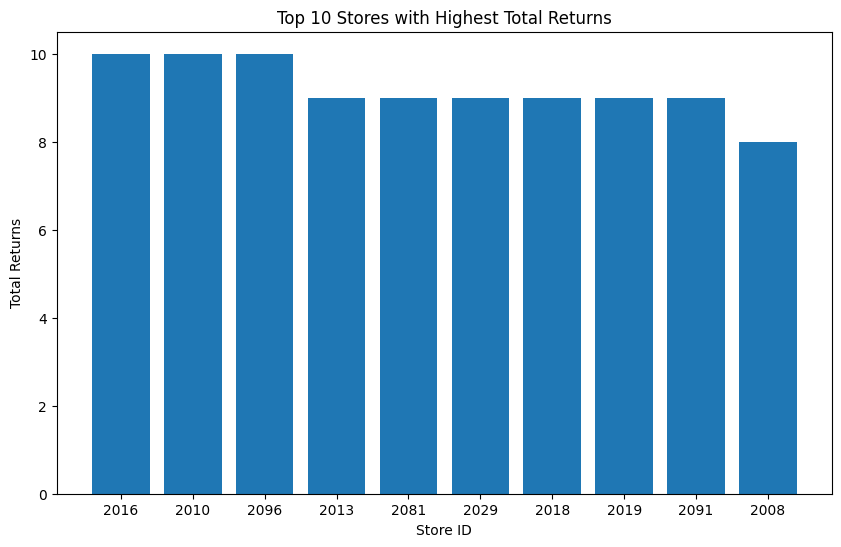

In [28]:
top_stores = store_with_hr.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_stores['StoreID'].astype(str), top_stores['total_returns'])
plt.xlabel('Store ID')
plt.ylabel('Total Returns')
plt.title('Top 10 Stores with Highest Total Returns')
plt.show()

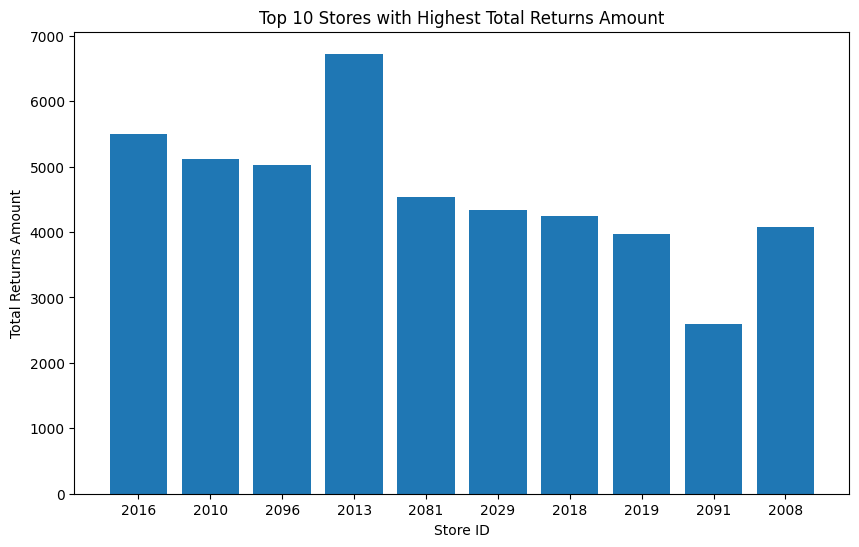

In [27]:
top_stores_amount = store_with_hr.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_stores_amount['StoreID'].astype(str), top_stores_amount['total_returns_amount'])
plt.xlabel('Store ID')
plt.ylabel('Total Returns Amount')
plt.title('Top 10 Stores with Highest Total Returns Amount')
plt.show()

In [50]:
merged_with_returns = pd.merge(merged, return_counts, on="Category", how="left")
returns_by_store_category = merged_with_returns.groupby(["StoreID", "Category"])["Return_Count"].sum().reset_index()
print("Returns per category per store:")
display(returns_by_store_category.head())

Returns per category per store:


,StoreID,Category,Return_Count
0,2000,Beverages,8066
1,2000,Dairy,846
2,2000,Fruits,148
3,2000,Grocery,5928
4,2000,Health,10


In [45]:
#product category with most returns
products = pd.read_csv("Products.csv")
returns = pd.read_csv("Returns.csv")
merged = pd.merge(products, returns, on="ProductID", how="inner")

return_counts = merged.groupby("Category")["ReturnID"].count().reset_index()
return_counts.columns = ["Category", "Return_Count"]
top_category = return_counts.sort_values("Return_Count", ascending=False).head(1)

return_by_product = merged.groupby(["ProductID", "ProductName", "Category"])["ReturnID"].count().reset_index()
return_by_product.columns = ["ProductID", "ProductName", "Category", "Return_Count"]
return_by_product.to_csv("returns_by_product.csv", index=False)
print("Returns per category:")
print(return_counts)

print("\nCategory with most returns:")
print(top_category)


Returns per category:
        Category  Return_Count
0      Beverages           218
1          Dairy            94
2    Electronics            20
3         Fruits            37
4        Grocery           228
5         Health            10
6  Personal Care           206
7         Snacks           161
8     Vegetables            26

Category with most returns:
  Category  Return_Count
4  Grocery           228


In [49]:
#product category with most revenue
orders = pd.read_csv("Orders.csv")

merged = pd.merge(orders, products, on="ProductID", how="inner")

product_revenue = merged.groupby(["ProductID", "ProductName", "Category"])["TotalAmount"].sum().reset_index()

top_products = product_revenue.sort_values("TotalAmount", ascending=False).head(10)


In [48]:
returns = pd.read_csv('Returns.csv')
returns_by_product = pd.read_csv('returns_by_product.csv')
returnbystores = pd.read_csv('return_by_stores.csv')
merged_returns_product = pd.merge(returns, returns_by_product, on='ProductID', how='left')
combined_returns_df = pd.merge(merged_returns_product, returnbystores, on='StoreID', how='left')
combined_returns_df.to_csv('combined_returns.csv', index=False)
display(combined_returns_df.head())

,ReturnID,OrderID,ProductID,CustomerID,StoreID,ReturnReason,ReturnDate,RefundAmount,ReturnStatus,ProductName,Category,Return_Count,Unnamed: 0,stale_returns,stale_refund,damaged_returns,damaged_refund,total_returns,total_returns_amount
0,17794,12794,1011,15794,2075,Stale Product,33:03.4,300,Processed,Bananas (12 pcs),Fruits,19,75,4,833,0,0,4,833
1,13898,8898,1030,11898,2050,Damaged Item,43:03.4,875,Processed,Johnson's Baby Powder 400g,Personal Care,22,50,4,1910,0,0,4,1910
2,17271,12271,1012,15271,2056,Damaged Item,13:03.4,360,Processed,Saffola Gold Oil 1L,Grocery,17,56,7,3594,0,0,7,3594
3,12959,7959,1028,10959,2050,Stale Product,23:03.4,600,Processed,Catch Black Pepper 100g,Grocery,12,50,4,1910,0,0,4,1910
4,13863,8863,1024,11863,2016,Stale Product,21:03.4,1125,Processed,Bournvita 500g,Beverages,29,16,10,5503,0,0,10,5503
